# 6.4 Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that graphs are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# define path
path = r'/Users/yusufsalk/Documents/Chocolate Bar Analysis'

In [4]:
#import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_bar.pkl'))

## 2. Data cleaning

In [5]:
df.columns

Index(['company_name', 'specific_bean_origin', 'ref', 'review_date',
       'cocoa_percentage', 'company_location', 'rating', 'broad_bean_origin'],
      dtype='object')

In [6]:
df.head(20)

,company_name,specific_bean_origin,ref,review_date,cocoa_percentage,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru
5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Venezuela
6,A. Morin,Cuba,1315,2014,0.70,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Venezuela
9,A. Morin,Pablino,1319,2014,0.70,France,4.00,Peru


In [7]:
df.shape

(1795, 8)

#### Missing Values

In [8]:
# check for missing values
df.isnull().sum()
# no missing value

company_name            0
specific_bean_origin    0
ref                     0
review_date             0
cocoa_percentage        0
company_location        0
rating                  0
broad_bean_origin       0
dtype: int64

#### Duplicates

In [9]:
# check for duplicates
dups = df.duplicated()

In [10]:
dups.shape 
#no dups

(1795,)

#### Extreme Values

/var/folders/8d/wh_s70hs0p1fxlntt5lttj6m0000gn/T/ipykernel_3119/2071708746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'], bins=16)


<Axes: xlabel='rating', ylabel='Density'>

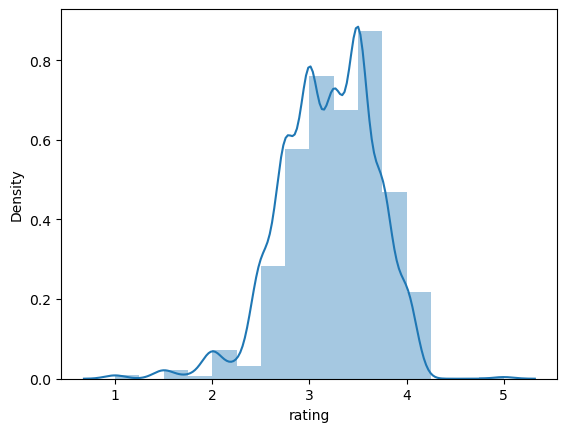

In [11]:
sns.distplot(df['rating'], bins=16)

In [12]:
# check the mean
df['rating'].mean()

3.185933147632312

In [13]:
# check the median
df['rating'].median()

3.25

In [14]:
# check the max
df['rating'].max()

5.0

## 3. Data prep for regression analysis

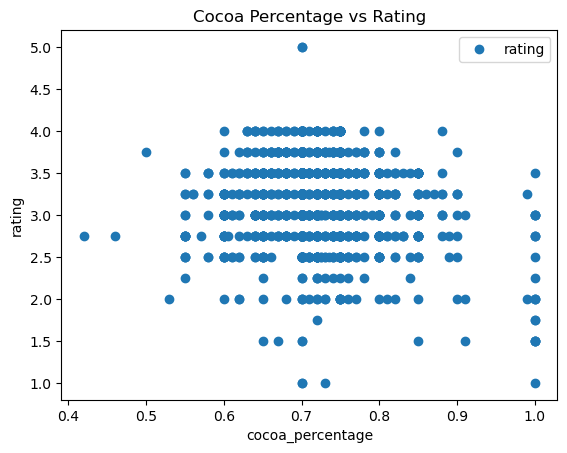

In [15]:
# create a scatterplot
df.plot(x = 'cocoa_percentage', y='rating',style='o')
plt.title('Cocoa Percentage vs Rating')
plt.xlabel('cocoa_percentage')  
plt.ylabel('rating')
plt.show()

Hypothesis: If the percentage of cocoa increases, the rating decreases.

In [16]:
# reshape the variables into NumPy arrays and put them into separate objects.
X = df['cocoa_percentage'].values.reshape(-1,1)
y = df['rating'].values.reshape(-1,1)

In [17]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [18]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [19]:
# split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [20]:
# create a regression object
regression = LinearRegression()

In [21]:
# fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

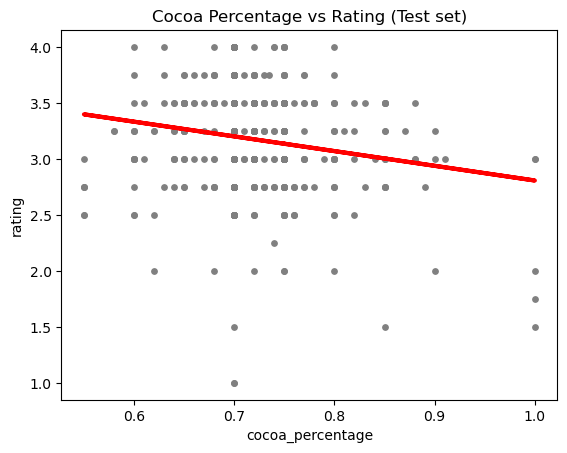

In [23]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Cocoa Percentage vs Rating (Test set)')
plot_test.xlabel('cocoa_percentage')
plot_test.ylabel('rating')
plot_test.show()

Looking at the scatterplot above, it can be seen that the linear model represented by the red regression line doesn’t perfectly cover all of the data points. In the area where cocoa percentage is around 0.9, for example, there are still many data points that indicate high rating, which contradicts the hypothesis.

In [24]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [25]:
# print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.20953513101526208
R2 score:  0.018110020461675203


In [26]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [27]:
# create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


Rating data points dispersed around at multiples of 0.25. (For example; 3.00, 3.25, 3.75 etc.) So, there is no continuous distribution between 0 and 5, conversely there are layers that data points aling on lines. This makes it difficult to predict the distribution by linear regression. The R2 score confirms this, since it is very low. A model with more dimensionality is needed to accurately predict ratings. Besides, data set contains selected products and not enough data size to train the model. The ratings given by different reviewers may reflect a variety of distributions. From all this, we can say that perhaps there is collection and measurement bias in the data.